In [1]:
import pickle
import pandas as pd
from openpyxl import load_workbook



In [2]:
dep = pickle.load(open('../pickles/line_depths_dict.p','rb'))

writer = pd.ExcelWriter('../NP_transects/transect_depths.xlsx', engine='openpyxl') 


for df_name, df in sorted(dep.items()):
    df.to_excel(writer, sheet_name=str(df_name))
    
writer.save()

In [3]:
den = pickle.load(open('/home/robbie/Dropbox/SP_W99_Drifters/den.p','rb'))

writer = pd.ExcelWriter('../NP_transects/transect_densities.xlsx', engine='openpyxl') 

for df_name, df in sorted(den.items()):
    df.to_excel(writer, sheet_name=str(df_name))
    
writer.save()

In [4]:
lwc = pickle.load(open('/home/robbie/Dropbox/SP_W99_Drifters/lwc.p','rb'))

writer = pd.ExcelWriter('../NP_transects/transect_SWE.xlsx', engine='openpyxl') 

for df_name, df in sorted(lwc.items()):
    df.to_excel(writer, sheet_name=str(df_name))
    
writer.save()

In [26]:
stakes = pickle.load(open('/home/robbie/Dropbox/SP_W99_Drifters/stakes_dict.p','rb'))

writer = pd.ExcelWriter('../NP_transects/stake_depths.xlsx', engine='openpyxl') 

for df_name, df in sorted(stakes.items()):
    df.to_excel(writer, sheet_name=str(df_name))
    
writer.save()

In [10]:
for key in den.keys():
    print(key,den[key].shape[1])

5 11
7 14
8 22
9 6
10 12
11 8
12 13
13 14
14 4
15 10
16 36
18 9
19 12
20 18
22 63
23 9
24 8
25 36
26 33
27 40
28 46
29 2
30 89
31 65


/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


[]

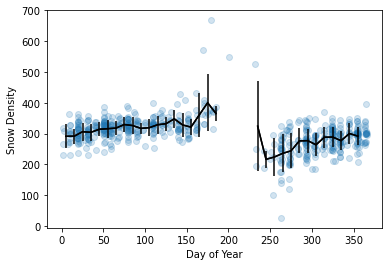

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binned_statistic

mean_densities = []


for key in den.keys():
    
    for col in den[key]:
        
        try:
            mean_densities.append( {'doy':col.timetuple().tm_yday,
                                    'den': np.nanmean(den[key][col])*1000,
                                    }
                                )

        except Exception as e:
            print(e)
            

            
# print(mean_densities)
            
df = pd.DataFrame(mean_densities)

df.dropna(inplace=True)
    
bins = np.arange(0,361,10)

bcs = np.arange(5,361,10)
            
means, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy'], df['den'],alpha=0.2)

plt.plot(bcs,means,color='k')
plt.errorbar(x=bcs,y=means,yerr=stds,color='k')

plt.ylabel('Snow Density')
plt.xlabel('Day of Year')

plt.plot()

Text(0, 0.5, '10 day running mean \n of density stdv')

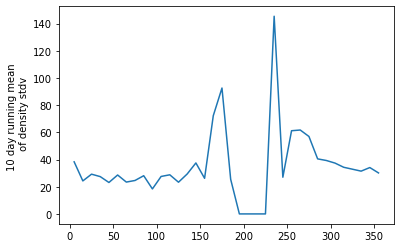

In [48]:
plt.plot(bcs,stds)
plt.ylabel('10 day running mean \n of density stdv')

# plt.ylim(0.02,0.04)